Title


In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import math
import json
import scipy
import librosa

In [2]:
def plot_waveforms(audio, fs):
    """Plots the waveform of audio in the time domain.
    
    Parameters:
        audio (numpy.ndarray): audio signal
        fs (int): sampling frequency (Hz) of audio signal
        
    """
    plt.figure(figsize=(12, 6))
    librosa.display.waveshow(audio, sr=fs, alpha=0.58)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.show()

In [3]:
def calculate_spectrum(audio, kind='mag'):
    """
    Calculates the spectrum of an audio signal.
    Parameters:
        audio (numpy.ndarray): audio signal
        kind (str): 'mag' for magnitude, 'phase' for phase, 'complex' for complex
    """
    spec = scipy.fft.fft(audio)
    if kind == 'mag':
        return 20*np.log10(np.abs(spec))
    elif kind == 'phase':
        return np.angle(spec)
    elif kind == 'complex':
        return 20*np.log10(spec)
    else:
        raise ValueError('Invalid kind')

In [4]:
#Function to plot spectrum 
def plot_spec(audio, fs, kind):
    """
    Plots the spectrum of an audio signal.
    parameters:
        audio (numpy.ndarray): audio signal
        fs (int): sampling frequency (Hz) of audio signal
        kind (str): 'mag' for magnitude, 'phase' for phase, 'complex' for complex
    """
    spec_db = calculate_spectrum(audio, kind)
    frequency_axis = np.linspace(0, fs, len(spec_db))
    #Nyquist frequencies
    frequency_axis = frequency_axis[:len(frequency_axis)//2]
    spec_db = spec_db[:len(spec_db)//2]

    #plot
    ax = plt.figure(figsize=(12, 6))
    plt.plot(frequency_axis, spec_db)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude (dB)")
    plt.show()
    if fs < 44100:
        plt.xticks([1, 2, 4, 8, 16, 31, 63, 125, 250,500,1000,2000,5000,10000], 
                   ["1", "2", "4", "8", "16", "31", "63", "125", "250", "500", "1K", "2K", "5K", "10K"])
    else:
        plt.xticks([1, 2, 4, 8, 16, 31, 63, 125, 250,500,1000,2000,5000,10000, 20000], 
                   ["1", "2", "4", "8", "16", "31", "63", "125", "250", "500", "1K", "2K", "5K", "10K", "20k"])


In [5]:
def calculate_stft(audio, fs, n_fft=2048, hop_length=512, dB=True):
    """
    Calculates the Short-Time Fourier Transform (STFT) of an audio signal.
    Parameters:
        audio (numpy.ndarray): audio signal
        fs (int): sampling frequency (Hz) of audio signal
        n_fft (int): number of samples per frame
        hop_length (int): number of samples between frames
        dB (bool): if True, returns the magnitude in decibels
    """
    stft = librosa.stft(audio, n_fft=n_fft, hop_length=hop_length)
    if dB:
        return librosa.amplitude_to_db(np.abs(stft)) # Convert to dB in log scale
    else:
        return np.abs(stft)

In [6]:
def spectrogram(audio, fs, n_fft = 2048, hop_length = 512, dB = True):
    """
    Plots the spectrogram of an audio signal.
    parameters:
        audio (numpy.ndarray): audio signal
        fs (int): sampling frequency (Hz) of audio signal
        n_fft (int): number of samples per frame
        hop_length (int): number of samples between frames
        dB (bool): if True, returns the magnitude in decibels
    """
    stft_db = calculate_stft(audio, fs, n_fft, hop_length, dB)
    plt.figure(figsize=(12,6))
    librosa.display.specshow(stft_db, sr=fs, hop_length=hop_length, x_axis='time', y_axis='linear', cmap = 'inferno')
    plt.title('Spectrogram')
    plt.colorbar(format='%+2.0f dB')
    plt.show()
    plt.tight_layout()

In [7]:
def calculate_mel_spec(audio, fs, n_mfcss=128, n_fft = 2048, hop_length = 512):
    mel_spec = librosa.feature.melspectrogram(audio, sr=fs, n_mels=n_mfcss, n_fft=n_fft, hop_length=hop_length)
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)
    return mel_spec_db


In [8]:
def plot_mel_spectrogram_audio(audio, fs, n_mfccs=128, n_fft=2048, hop_length=512, fig_size=(12,6)):
    """Plots the mel-scaled spectrogram from audio signal.
    
    Parameters:
        audio (numpy.ndarray): audio signal
        fs (int): sampling frequency (Hz) of audio signal
        n_mfccs: The number of MFCCs to compute (i.e. dimensionality of mel spectrum)
        n_fft (int): The length (i.e. resolution) of the FFT window (must be power of 2)
        hop_length (int): The number of samples between successive frames
        fig_size (tuple): Dimensions of figure
    """
    # Calculate mel-spectrogram
    mel_spec_db = calculate_mel_spec(audio, fs, n_mfccs=n_mfccs, n_fft=n_fft, hop_length=hop_length)
    
    # Plot Spectrogram
    plt.figure(figsize=fig_size)
    librosa.display.specshow(data=mel_spec_db, sr=fs, x_axis='time', y_axis='mel', cmap='viridis')

    # Put a descriptive title on the plot
    plt.title('Mel Power Spectrogram')

    # draw a color bar
    plt.colorbar(format='%+02.0f dB')

    # Make the figure layout compact
    plt.tight_layout()

In [9]:
def plot_low_res_mfcc(mfcc, fs, fig_size=(12,6)):
    """Plots the mel-scaled spectrogram from mfccs. This is performing the same task as
    'plot_mel_spectrogram_audio' with just a different input.
    
    Parameters:
        mfcc (numpy.ndarray): mfccs of an audio signal
        fs (int): sampling frequency (Hz) of audio signal
        fig_size (tuple): Dimensions of figure
    """
    # Plot Spectrogram
    plt.figure(figsize=fig_size)
    
    # Display the spectrogram on a mel scale
    # sample rate and hop length parameters are used to render the time axis
    # abs on signal for better visualization
    librosa.display.specshow(data=mfcc, sr=fs, x_axis='time', y_axis='linear', cmap='viridis')
    
    # Put a descriptive title on the plot
    plt.title('MFCCs')

    # draw a color bar
    plt.colorbar(format='%+02.0f dB')

    # Make the figure layout compact
    plt.tight_layout()


Pre-Processed Data Examples:

In [10]:
path_data = 'C:/Users/aksha/Downloads/DataMusic/genres_original/'
genre = 'disco/'
filename = 'disco.00000.wav'

file_path = path_data + genre + filename

print(file_path)

C:/Users/aksha/Downloads/DataMusic/genres_original/disco/disco.00000.wav


In [11]:
fs = 22050 # sampling rate for librosa to resample to
audio_ex, fs = librosa.load(path=file_path, sr=fs) # load audio and sampling rate


Example Disco Track audio waveform plotted

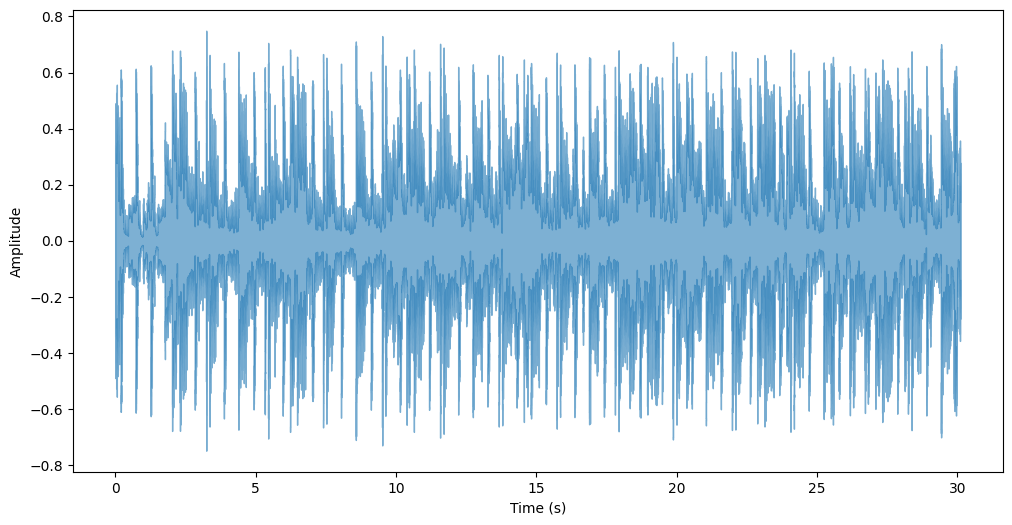

In [12]:
plot_waveforms(audio_ex, fs)

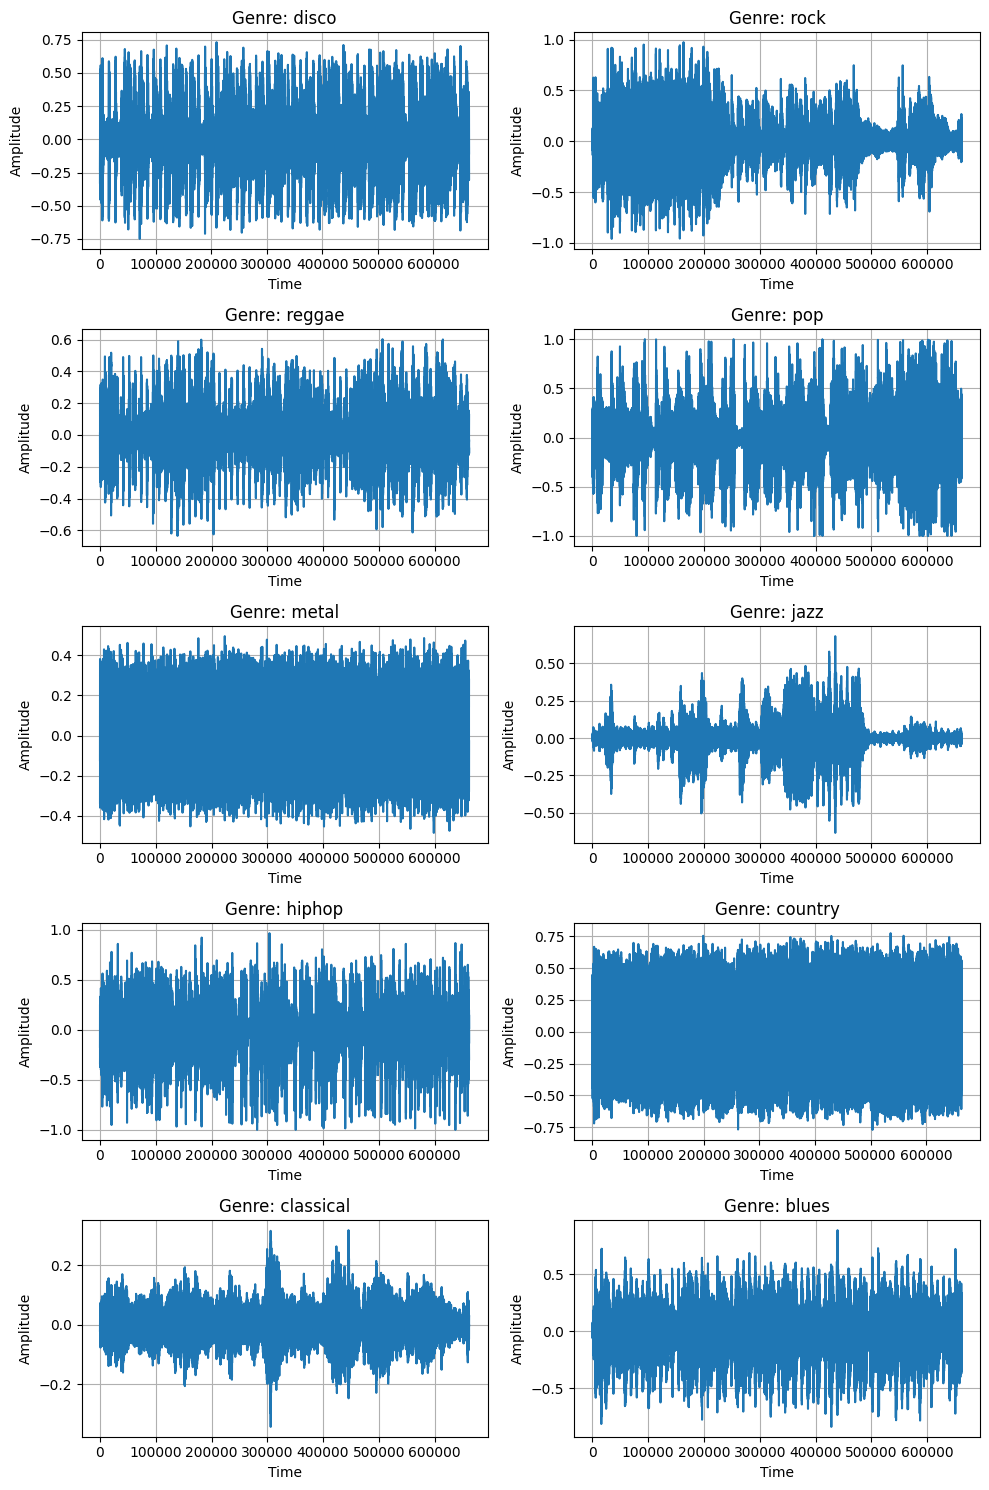

In [13]:
# Define file paths for all genres
path_data = 'C:/Users/aksha/Downloads/DataMusic/genres_original/'

genres = ['disco', 'rock', 'reggae', 'pop', 'metal', 'jazz', 'hiphop', 'country', 'classical', 'blues']
file_paths = {genre: path_data + genre + '/' + genre + '.00000.wav' for genre in genres}

# Function to plot waveforms
def plot_waveforms(audio_data, sampling_rate, genre_name, subplot_num):
    plt.subplot(5, 2, subplot_num)
    plt.plot(audio_data)
    plt.title(f'Genre: {genre_name}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.grid(True)

# Plotting all waveforms
fs = 22050  # Sampling rate for librosa
plt.figure(figsize=(10, 15))

for i, genre in enumerate(genres):
    file_path = file_paths[genre]
    audio_ex, fs = librosa.load(path=file_path, sr=fs)  # Load audio and resample
    plot_waveforms(audio_ex, fs, genre, i + 1)

plt.tight_layout()
plt.show()


Process code and pad the code to save into .json

In [14]:
import os
import librosa
import numpy as np
import json
import math

def get_mfccs(directory_path, fs=22500, duration=30, n_fft=2048, hop_length=512, n_mfcc=13, num_segments=10, save_path='C:/Users/aksha/Downloads/DataMusic/data.json'):
    """
    Reads through a directory of audio files and saves a dictionary of MFCCs and genres to a .json file.
    It also returns numpy.ndarrays for MFCCs, genre name, and genre number for each segment of the audio signal.

    Parameters:
        directory_path (str): Path to the directory containing audio files, where each genre has its own folder.
        fs (int): Sampling frequency (Hz) of the audio signal.
        duration (int): Duration of audio signal (sec).
        n_fft (int): The length (i.e. resolution) of the FFT window (must be a power of 2).
        hop_length (int): The number of samples between successive frames.
        n_mfcc (int): The number of MFCCs to compute (dimensionality of mel spectrum).
        num_segments (int): The number of segments to divide the audio signal into.
        save_path (str): The path where the JSON file will be saved.

    Returns:
        np.ndarray: MFCCs for each segment of audio.
        np.ndarray: Genre names for each segment.
        np.ndarray: Genre numbers for each segment.
    """
    data = {
        "genre_name": [],   # List of genre names (i.e., blues, classical, etc.)
        "genre_num": [],    # List of genre numbers (i.e., 0, 1, 2, etc.)
        "mfcc": []          # List of MFCC vectors
    }

    # Calculate the number of samples per track and per segment
    samples_per_track = fs * duration
    samps_per_segment = int(samples_per_track / num_segments)
    mfccs_per_segment = math.ceil(samps_per_segment / hop_length)

    # Loop through all folders & files in the directory
    print("MFCC collection started!")
    print("========================")
    for i, (path_current, folder_names, file_names) in enumerate(os.walk(directory_path)):
        # Skip the parent directory
        if path_current != directory_path:
            genre_current = path_current.split('/')[-1]  # Genre name is the folder name

            # Loop through each file in the genre folder
            for file in file_names:
                file_path = os.path.join(path_current, file).replace(os.sep, '/')  # Get the file path

                try:
                    # Load audio data and resample to fs
                    audio, fs = librosa.load(file_path, sr=fs)

                    # Ensure all audio signals are padded to the same length as the longest one
                    max_len = max([len(audio) for audio in [audio]])  # Get the length of the largest audio signal
                    audio = np.pad(audio, (0, max_len - len(audio)), mode='constant')  # Pad the audio

                    # Loop through audio file segments
                    for seg in range(num_segments):
                        start_sample = seg * samps_per_segment
                        end_sample = start_sample + samps_per_segment

                        # Calculate MFCCs for the segment
                        mfcc = librosa.feature.mfcc(
                            y=audio[start_sample:end_sample],
                            sr=fs,
                            n_fft=n_fft,
                            hop_length=hop_length,
                            n_mfcc=n_mfcc
                        )
                        mfcc = mfcc.T  # Transpose for the correct format

                        # Check if the MFCC length matches the expected number
                        if len(mfcc) == mfccs_per_segment:
                            data["genre_name"].append(genre_current)  # Append genre name
                            data["genre_num"].append(i - 1)  # Append genre number
                            data["mfcc"].append(mfcc.tolist())  # Append MFCC data
                except Exception as e:
                    print(f"Error processing {file_path}: {e}")
                    continue

            print(f"Collected MFCCs for {genre_current.title()}!")

    # Save data to a JSON file
    with open(save_path, 'w') as filepath:
        print("========================")
        print("Saving data to disk...")
        json.dump(data, filepath, indent=4)
        print(f"Saving complete! The JSON file has been saved to {save_path}")
        print("========================")

    return np.array(data["mfcc"]), np.array(data["genre_name"]), np.array(data["genre_num"])


In [15]:

# Example usage of the function
import time

# Set parameters for MFCC extraction
fs = 22500  # Sampling rate (Hz)
n_mfcc = 13  # Number of MFCCs
n_fft = 2048  # FFT window size
hop_length = 512  # Hop length
num_segments = 10  # Number of segments (split the track into 10 segments)
track_duration = 30  # Duration of each track (seconds)

# Set the path for the directory containing your data
directory_path = 'C:/Users/aksha/Downloads/DataMusic/genres_original/'  # Path to your audio data
save_path = 'C:/Users/aksha/Downloads/DataMusic/data.json'  # Path to save the JSON file

# Call the function to extract MFCCs and save to JSON
start_time = time.time()
mfccs, genres, genre_nums = get_mfccs(directory_path,
                                      fs=fs,
                                      duration=track_duration,
                                      n_fft=n_fft,
                                      hop_length=hop_length,
                                      n_mfcc=n_mfcc,
                                      num_segments=num_segments,
                                      save_path=save_path)
end_time = time.time()

print(f"MFCC extraction completed in {end_time - start_time:.2f} seconds.")


MFCC collection started!
Collected MFCCs for Blues!
Collected MFCCs for Classical!
Collected MFCCs for Country!
Collected MFCCs for Disco!
Collected MFCCs for Hiphop!


C:\Users\aksha\AppData\Local\Temp\ipykernel_25172\3156797829.py:52: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, fs = librosa.load(file_path, sr=fs)
c:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing C:/Users/aksha/Downloads/DataMusic/genres_original/jazz/jazz.00054.wav: 
Collected MFCCs for Jazz!
Collected MFCCs for Metal!
Collected MFCCs for Pop!
Collected MFCCs for Reggae!
Collected MFCCs for Rock!
Saving data to disk...
Saving complete! The JSON file has been saved to C:/Users/aksha/Downloads/DataMusic/data.json
MFCC extraction completed in 96.05 seconds.


In [16]:
# Review mfccs and genres for the correct shape
print(f"MFCCs: {mfccs.shape}")
print(f"genres: {genres.shape}")


MFCCs: (9989, 132, 13)
genres: (9989,)


In [17]:
# Map target genre to number
genre_map = dict(zip(sorted(set(genres)), np.arange(0, 10)))
genres_num = np.array(pd.Series(genres).map(genre_map))
# list(zip(genres_num, genres)) # view mapped target


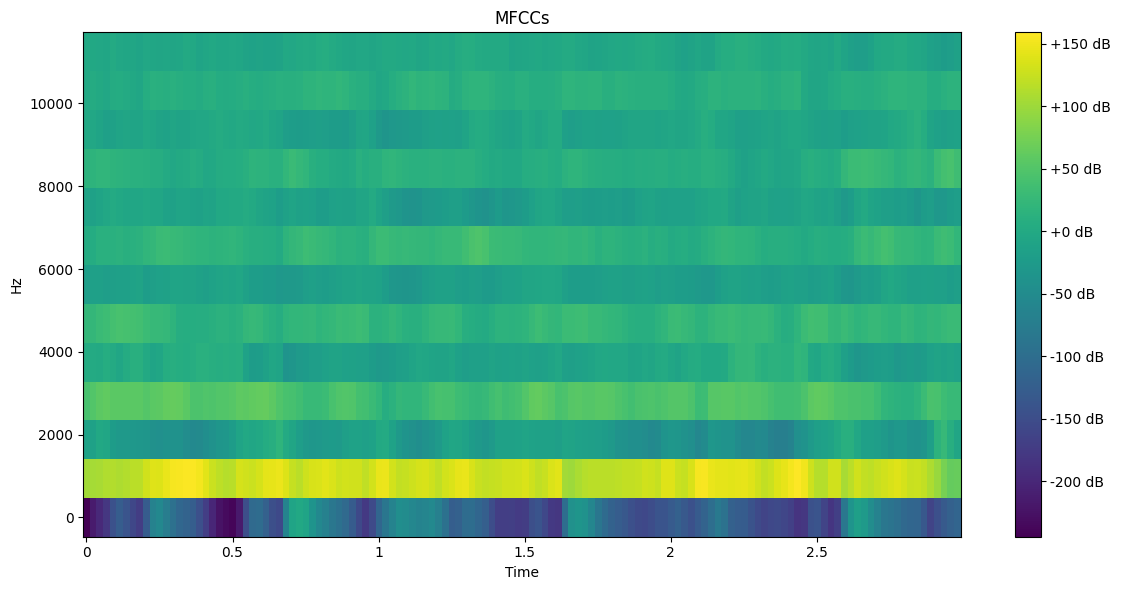

In [27]:
# Plot an MFCC example
idx = 0
plot_low_res_mfcc(mfccs[idx].T, fs)
#plt.title(f"{genres[idx].title()}");


# Model Input

In [28]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import os
import json
import librosa

# Sklean
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# TensorFlow
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator


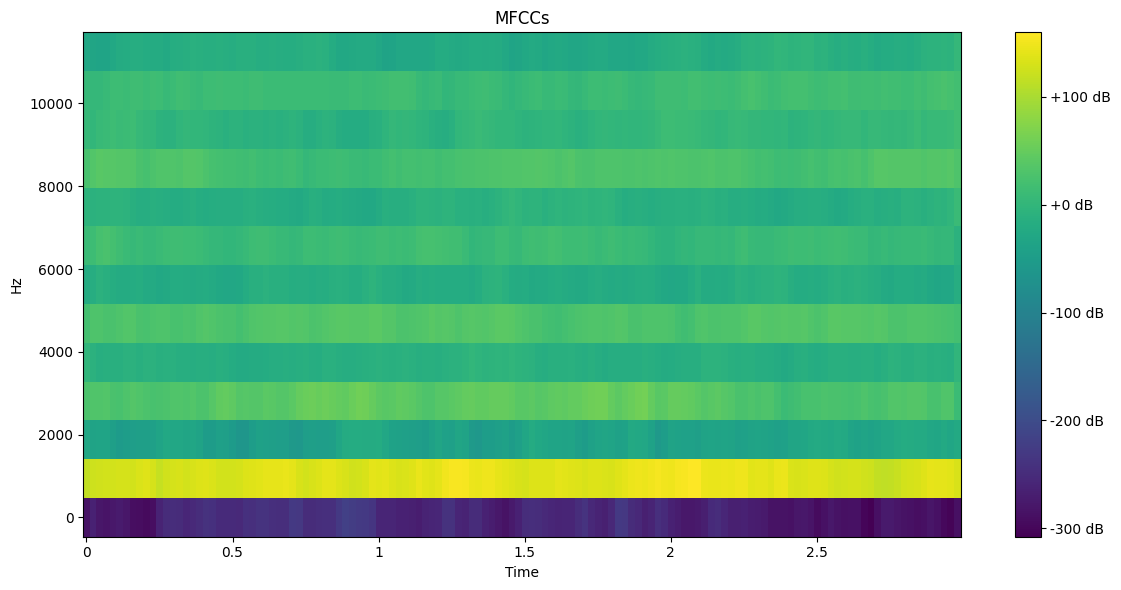

In [32]:
idx = 1000
fs = 22500

plot_low_res_mfcc(mfccs[idx].T, fs)


In [41]:
filepath = 'C:/Users/aksha/Downloads/DataMusic/data.json'
with open(filepath, "r") as fp:
    data = json.load(fp)

# Define X nd y
X = np.array(data["mfcc"])
y = np.array(data["genre_num"])

In [42]:
print(np.shape(X))
print(np.shape(y))

(9989, 132, 13)
(9989,)


In [43]:
from sklearn.model_selection import train_test_split

# Split the data into train (80%), validation (10%), and test (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42, stratify=y_train)

# Shape of the splits after optimization
print(f"X training data shape: {X_train.shape}, y training data shape: {y_train.shape}")
print(f"X validation data shape: {X_val.shape}, y validation data shape: {y_val.shape}")
print(f"X test data shape: {X_test.shape}, y test data shape: {y_test.shape}")


X training data shape: (6992, 132, 13), y training data shape: (6992,)
X validation data shape: (999, 132, 13), y validation data shape: (999,)
X test data shape: (1998, 132, 13), y test data shape: (1998,)


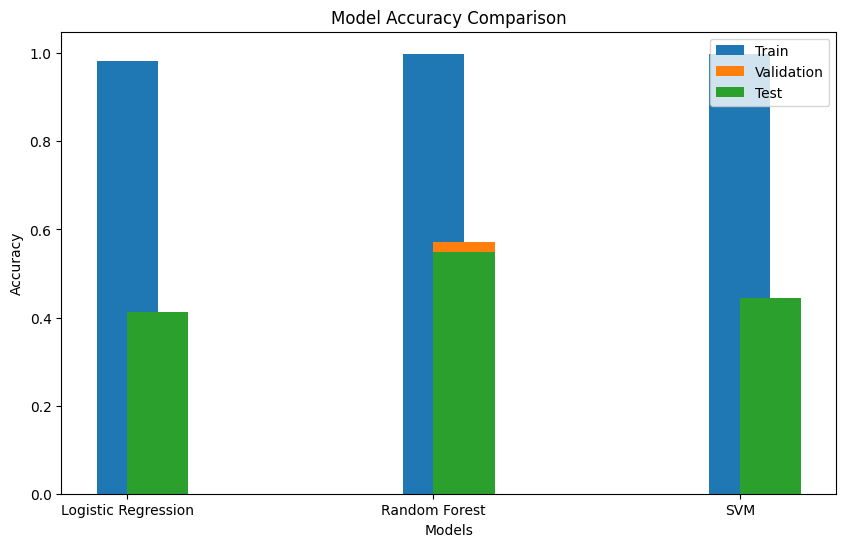

In [ ]:
import os
import librosa
import numpy as np
import json
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load data (assuming you have already prepared your MFCCs and saved them in 'data.json')
def load_data(file_path):
    with open(file_path, 'r') as f:
        data = json.load(f)
    X = np.array(data["mfcc"])
    y = np.array(data["genre_num"])
    return X, y

# Load data
directory_path = 'C:/Users/aksha/Downloads/DataMusic/data.json'
X, y = load_data(directory_path)

# Train-test split (80% train, 10% validation, 10% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Standardizing the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1))  # Flatten the data
X_val_scaled = scaler.transform(X_val.reshape(X_val.shape[0], -1))  # Flatten the data
X_test_scaled = scaler.transform(X_test.reshape(X_test.shape[0], -1))  # Flatten the data

# Initialize lists to store accuracy scores for training, validation, and test sets
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Logistic Regression
logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

# Calculate training accuracy
train_accuracies.append(accuracy_score(y_train, logreg.predict(X_train_scaled)))
# Calculate validation accuracy
val_accuracies.append(accuracy_score(y_val, logreg.predict(X_val_scaled)))
# Calculate test accuracy
test_accuracies.append(accuracy_score(y_test, logreg.predict(X_test_scaled)))

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)

# Calculate training accuracy
train_accuracies.append(accuracy_score(y_train, rf.predict(X_train_scaled)))
# Calculate validation accuracy
val_accuracies.append(accuracy_score(y_val, rf.predict(X_val_scaled)))
# Calculate test accuracy
test_accuracies.append(accuracy_score(y_test, rf.predict(X_test_scaled)))

# Support Vector Machine (SVM)
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train_scaled, y_train)

# Calculate training accuracy
train_accuracies.append(accuracy_score(y_train, svm.predict(X_train_scaled)))
# Calculate validation accuracy
val_accuracies.append(accuracy_score(y_val, svm.predict(X_val_scaled)))
# Calculate test accuracy
test_accuracies.append(accuracy_score(y_test, svm.predict(X_test_scaled)))

# Plotting Accuracy for Training, Validation, and Test Set
labels = ['Logistic Regression', 'Random Forest', 'SVM']
x = range(len(labels))

# Plot the accuracies
plt.figure(figsize=(10, 6))
plt.bar(x, train_accuracies, width=0.2, label="Train", align='center')
plt.bar(x, val_accuracies, width=0.2, label="Validation", align='edge')
plt.bar(x, test_accuracies, width=0.2, label="Test", align='edge')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xticks(x, labels)
plt.legend()
plt.show()


# CNN Model with Regularization and Optimized for multiple classes classification


In [52]:
filepath = 'C:/Users/aksha/Downloads/DataMusic/data.json'
with open(filepath, "r") as fp:
    data = json.load(fp)

# Define X nd y
X = np.array(data["mfcc"])
y = np.array(data["genre_num"])

from sklearn.model_selection import train_test_split

# Split the data into train (80%), validation (10%), and test (10%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.125, random_state=42, stratify=y_train)

# Shape of the splits after optimization
print(f"X training data shape: {X_train.shape}, y training data shape: {y_train.shape}")
print(f"X validation data shape: {X_val.shape}, y validation data shape: {y_val.shape}")
print(f"X test data shape: {X_test.shape}, y test data shape: {y_test.shape}")


X training data shape: (6992, 132, 13), y training data shape: (6992,)
X validation data shape: (999, 132, 13), y validation data shape: (999,)
X test data shape: (1998, 132, 13), y test data shape: (1998,)


Before reshaping:
X_train: (6992, 132, 13), y_train: (6992,)
X_val: (999, 132, 13), y_val: (999,)
X_test: (1998, 132, 13), y_test: (1998,)

CNN input shapes:
X_train_cnn: (6992, 132, 13, 1)
X_val_cnn: (999, 132, 13, 1)
X_test_cnn: (1998, 132, 13, 1)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 132, 13, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 132, 13, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 66, 6, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 66, 6, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 66, 6, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 66, 6, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 33, 3, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 33, 3, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 33, 3, 128)     │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 33, 3, 128)     │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 2, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 17, 2, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4352)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       557,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 611,082 (2.33 MB)

 Trainable params: 610,634 (2.33 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.1706 - loss: 2.8689 - val_accuracy: 0.2943 - val_loss: 1.9628
Epoch 2/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.2826 - loss: 2.0241 - val_accuracy: 0.3804 - val_loss: 1.7586
Epoch 3/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.3039 - loss: 1.8967 - val_accuracy: 0.4114 - val_loss: 1.6802
Epoch 4/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.3486 - loss: 1.7599 - val_accuracy: 0.4354 - val_loss: 1.6186
Epoch 5/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.3764 - loss: 1.6885 - val_accuracy: 0.4755 - val_loss: 1.5273
Epoch 6/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.3985 - loss: 1.6203 - val_accuracy: 0.4985 - val_loss: 1.4626
Epoch 7/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.4290 - loss: 1.5522 - val_accuracy: 0.5115 - val_loss: 1.4304
Epoch 8/100
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.4523 - loss: 1.5017 - 

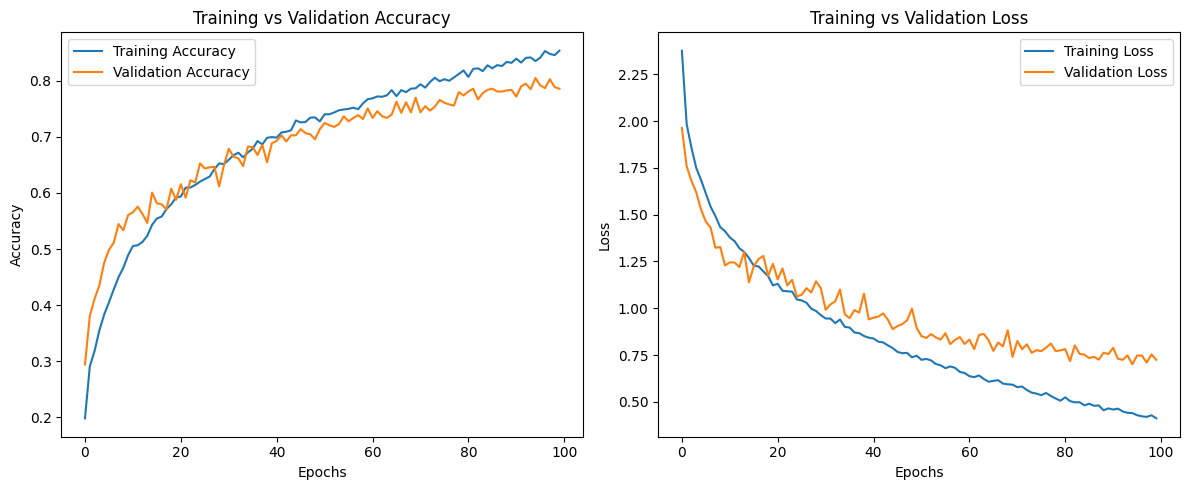

63/63 - 0s - 7ms/step - accuracy: 0.7983 - loss: 0.6790

Test Accuracy: 0.7983


In [56]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Confirm shapes before reshaping:
print("Before reshaping:")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

# Ensure proper CNN reshaping:
X_train_cnn = X_train[..., np.newaxis] # (samples, 132, 13, 1)
X_val_cnn = X_val[..., np.newaxis]
X_test_cnn = X_test[..., np.newaxis]

input_shape = (132, 13, 1)

# Confirm final shape for CNN:
print("\nCNN input shapes:")
print(f"X_train_cnn: {X_train_cnn.shape}")
print(f"X_val_cnn: {X_val_cnn.shape}")
print(f"X_test_cnn: {X_test_cnn.shape}")

# CNN Model designed for your data dimensions
model_cnn = Sequential()

# Block 1
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape, padding='same'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Dropout(0.2))

# Block 2
model_cnn.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Dropout(0.3))

# Block 3 - smaller kernel to handle reduced size
model_cnn.add(Conv2D(128, (2, 2), activation='relu', padding='same'))
model_cnn.add(BatchNormalization())
model_cnn.add(MaxPooling2D((2, 2), padding='same'))
model_cnn.add(Dropout(0.3))

# Flatten and Dense Layers
model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dropout(0.5))

# Output layer for 10 genres
model_cnn.add(Dense(10, activation='softmax'))

# Model summary
model_cnn.summary()

# Compile model
model_cnn.compile(optimizer=Adam(0.0001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Train model (no augmentation for now to ensure quick and effective results)
history = model_cnn.fit(
    X_train_cnn, y_train,
    validation_data=(X_val_cnn, y_val),
    epochs=100,
    batch_size=32,
    callbacks=[early_stopping],
    verbose=1
)

# Plotting results
plt.figure(figsize=(12, 5))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate on test set:
test_loss, test_acc = model_cnn.evaluate(X_test_cnn, y_test, verbose=2)
print(f"\nTest Accuracy: {test_acc:.4f}")


# Confusion Matrices


✅ Model saved as 'cnn_music_genre_model.h5'


✅ Model loaded successfully
✅ Predictions complete!


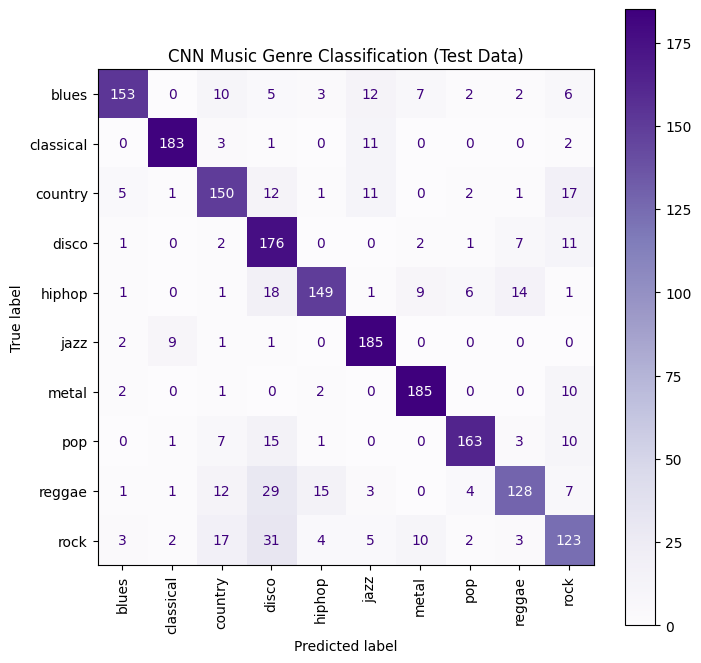

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.models import load_model

# Define genres explicitly
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 
          'jazz', 'metal', 'pop', 'reggae', 'rock']

# Save your trained model
model_cnn.save('cnn_music_genre_model.h5')
print("✅ Model saved as 'cnn_music_genre_model.h5'")

# Load the saved model (just to show you how to do it later)
model_loaded = load_model('cnn_music_genre_model.h5')
print("✅ Model loaded successfully")

# Define the prediction function
def make_prediction(model, X):
    preds_num = []
    preds_name = []
    for X_current in X:
        X_current = X_current[np.newaxis, ...]  # Add batch dimension
        pred = model.predict(X_current, verbose=0)
        pred_idx = np.argmax(pred, axis=1)[0]  # Predicted genre index
        preds_num.append(pred_idx)
        preds_name.append(genres[pred_idx])
    return preds_num, preds_name

# Make predictions
preds_num, preds_name = make_prediction(model_loaded, X_test_cnn)
print("✅ Predictions complete!")

# Generate confusion matrix
cm = confusion_matrix(y_test, preds_num)

# Plot confusion matrix
fig, ax = plt.subplots(figsize=(8,8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=genres)
disp.plot(ax=ax, cmap='Purples', xticks_rotation='vertical')
plt.title('CNN Music Genre Classification (Test Data)')
plt.show()


# Optimized CNN Model with further tuning 

Optimized CNN Model Definition

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Optimized CNN Architecture
model_cnn_v2 = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(132, 13, 1)),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),
    Dropout(0.2),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),
    Dropout(0.3),

    Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2, 2), padding='same'),
    Dropout(0.4),

    GlobalAveragePooling2D(),

    Dense(256, activation='relu'),
    Dropout(0.5),

    Dense(10, activation='softmax')  # 10 genres/classes
])

# Model summary
model_cnn_v2.summary()


c:\Users\aksha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 132, 13, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 132, 13, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 66, 7, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 66, 7, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 66, 7, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 66, 7, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 33, 4, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 33, 4, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 33, 4, 128)     │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 33, 4, 128)     │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 17, 2, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 17, 2, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 129,162 (504.54 KB)

 Trainable params: 128,714 (502.79 KB)

 Non-trainable params: 448 (1.75 KB)

Compiling and Training

In [60]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Compile the model
model_cnn_v2.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping and LR reduction
early_stopping_v2 = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr_v2 = ReduceLROnPlateau(monitor='val_loss', patience=10, factor=0.5, verbose=1)

# Train the model
history_v2 = model_cnn_v2.fit(
    X_train_cnn, y_train,
    validation_data=(X_val_cnn, y_val),
    epochs=200,
    batch_size=32,
    callbacks=[early_stopping_v2, reduce_lr_v2],
    verbose=1
)


Epoch 1/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.2121 - loss: 2.3369 - val_accuracy: 0.3634 - val_loss: 1.9127 - learning_rate: 1.0000e-04
Epoch 2/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.4098 - loss: 1.7237 - val_accuracy: 0.4745 - val_loss: 1.5907 - learning_rate: 1.0000e-04
Epoch 3/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.4711 - loss: 1.5219 - val_accuracy: 0.5546 - val_loss: 1.3789 - learning_rate: 1.0000e-04
Epoch 4/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.5179 - loss: 1.4335 - val_accuracy: 0.5806 - val_loss: 1.2958 - learning_rate: 1.0000e-04
Epoch 5/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.5488 - loss: 1.3536 - val_accuracy: 0.6266 - val_loss: 1.1973 - learning_rate: 1.0000e-04
Epoch 6/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 35ms/step - accuracy: 0.5622 - loss: 1.3020 - val_accuracy: 0.6677 - val_loss: 1.1222 - learning_rate: 1.0000e-04
Epoch 7/200
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/st

Statistics & Graphs (Accuracy and Loss)


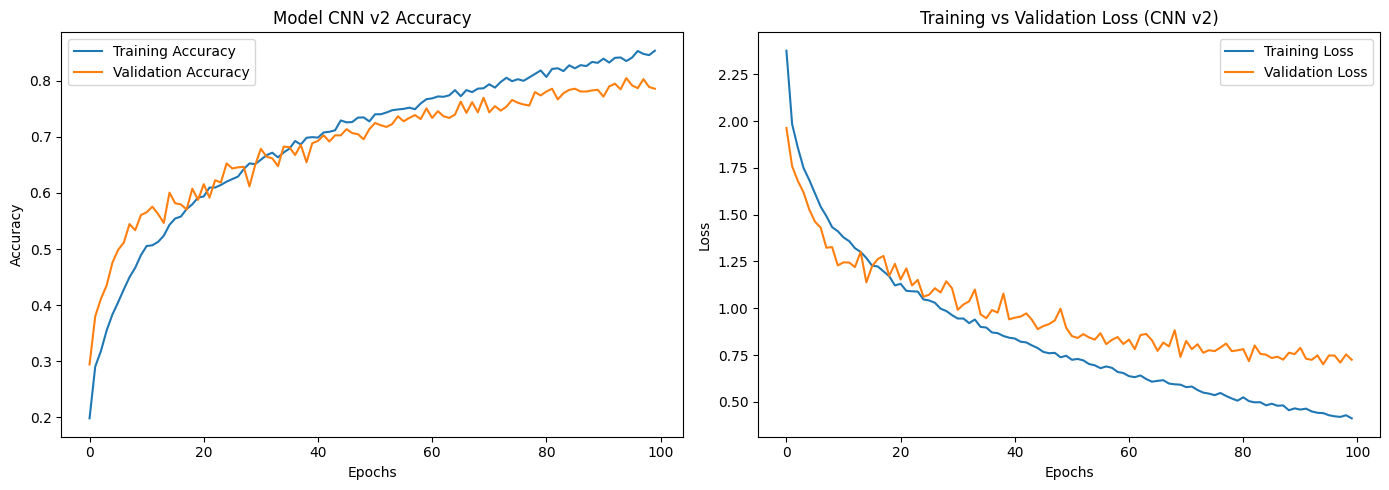

63/63 - 1s - 12ms/step - accuracy: 0.9259 - loss: 0.2600

✅ CNN v2 Test Accuracy: 0.7983


In [61]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model CNN v2 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss (CNN v2)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate final accuracy on test set
test_loss_v2, test_acc_v2 = model_cnn_v2.evaluate(X_test_cnn, y_test, verbose=2)
print(f"\n✅ CNN v2 Test Accuracy: {test_acc:.4f}")


Model Saving & Predictions

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Save the optimized model
model_cnn_v2.save('cnn_music_genre_model_v2.h5')
print("✅ CNN model v2 saved as 'cnn_music_genre_model_v2.h5'")

# Make predictions function
def make_prediction_v2(model, X):
    genres = ['blues', 'classical', 'country', 'disco', 'hiphop',
              'jazz', 'metal', 'pop', 'reggae', 'rock']
    preds_num, preds_name = [], []

    preds = model.predict(X, verbose=0)
    preds_num = np.argmax(preds, axis=1)
    preds_name = [genres[i] for i in preds_num]

    return preds_num, preds_name

# Make predictions
preds_num_v2, preds_name_v2 = make_predictions_v2(model_cnn_v2, X_test_cnn)

# Calculate confusion matrix
cm_v2 = confusion_matrix(y_test, preds_num_v2)

# Plot confusion matrix
genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 
          'jazz', 'metal', 'pop', 'reggae', 'rock']

fig, ax = plt.subplots(figsize=(10,10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=genres)
disp.plot(ax=ax, cmap='Blues', xticks_rotation='vertical')
plt.title('CNN v2 - Genre Classification Confusion Matrix')
plt.show()

# Test Accuracy
test_loss, test_acc = model_cnn_v2.evaluate(X_test_cnn, y_test, verbose=2)
print(f"\n✅ Test Accuracy (CNN v2): {test_acc:.4f}")


✅ CNN model v2 saved as 'cnn_music_genre_model_v2.h5'


NameError: name 'make_predictions_v2' is not defined